In [23]:
import numpy as np

import random as rnd

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
iris = pd.read_csv("/Users/aarathisrinivasnadathur/Downloads/Iris.csv") 


iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# SCATTER PLOT

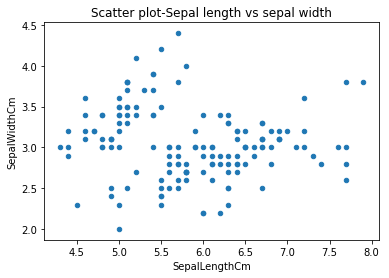

In [25]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.title('Scatter plot-Sepal length vs sepal width')
plt.show()


# JOINT PLOT

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


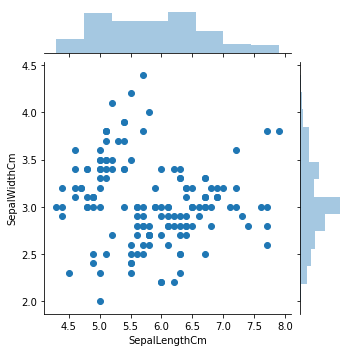

In [27]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

plt.show()

# Andrews Curves

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  


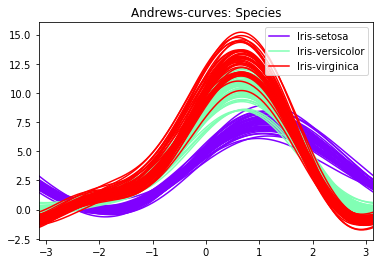

In [40]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species",colormap='rainbow')
plt.grid(False)
plt.title('Andrews-curves: Species')
plt.show()

In [7]:
data = pd.read_csv('/Users/aarathisrinivasnadathur/Downloads/mental-heath-in-tech-2016_20161114.csv')

In [10]:
# DATA CLEANING

data.loc[(data['What is your age?'] > 90), 'What is your age?'] = 34
data.loc[(data['What is your age?'] < 10), 'What is your age?'] = 34
data['What is your gender?'] = data['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
data['What is your gender?'] = data['What is your gender?'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
data['What is your gender?'] = data['What is your gender?'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')


data['What is your gender?'] = data['What is your gender?'].replace(np.NaN, 'Male')
data['What is your gender?'].unique()

array(['Male', 'Female', 'Genderqueer/Other'], dtype=object)

In [13]:
data.rename(columns={'What is your age?': 'Age',
                     'What is your gender?': 'Gender',
                     'Do you currently have a mental health disorder?': 'Has MHD'}, inplace=True)


# FACET GRID

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


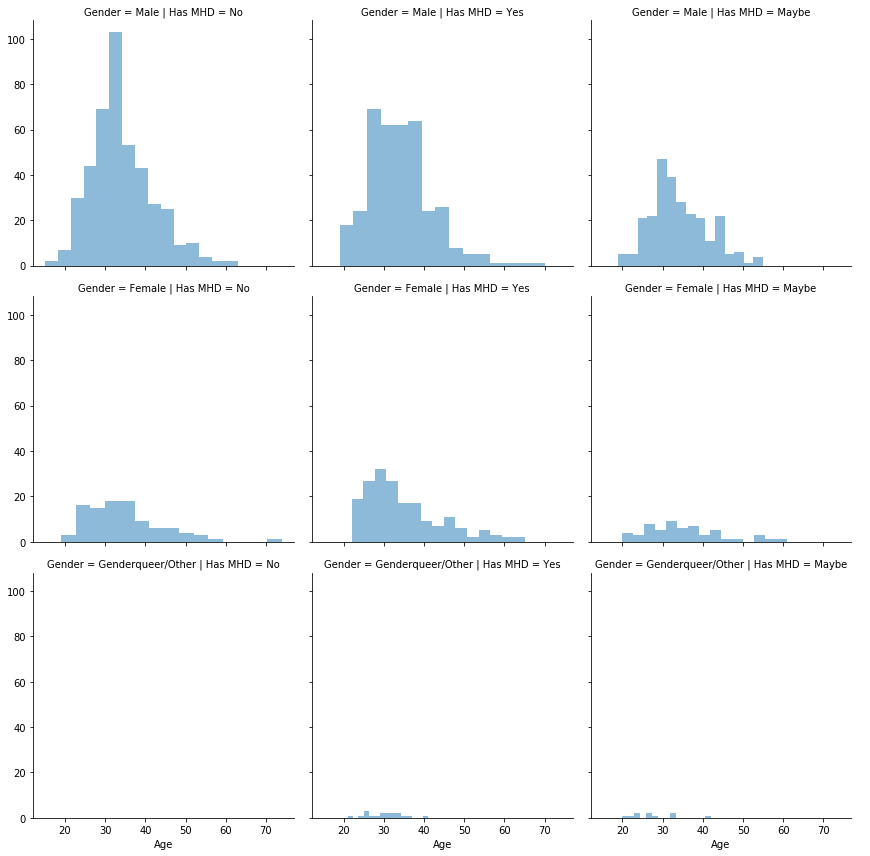

In [30]:
g = sns.FacetGrid(data, row='Gender', col='Has MHD', size=4)
g.map(plt.hist, 'Age', alpha=0.5, bins=15)
g.add_legend()

plt.show()

# PIE CHART

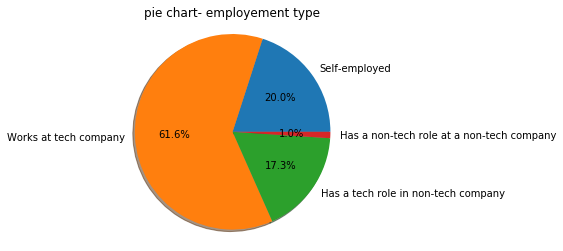

In [31]:
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']
sizes = [data['Are you self-employed?'].value_counts()[1],
         data['Is your employer primarily a tech company/organization?'].value_counts()[1],
         data['Is your primary role within your company related to tech/IT?'].value_counts()[1],
         data['Is your primary role within your company related to tech/IT?'].value_counts()[0]
        ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('pie chart- employement type')
plt.show()

# COUNT PLOT

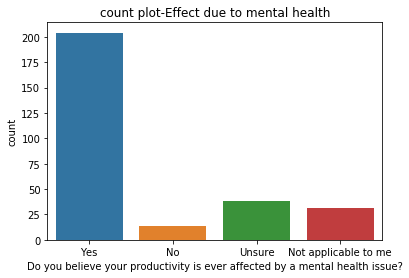

In [34]:
g = sns.countplot(x='Do you believe your productivity is ever affected by a mental health issue?',
                  data=data, order=['Yes', 'No', 'Unsure', 'Not applicable to me'])
plt.title('count plot-Effect due to mental health')
plt.show()

In [16]:
df_original = pd.read_csv("/Users/aarathisrinivasnadathur/Downloads/winemag-data_first150k.csv")

# BAR PLOT

Text(0.5, 1.0, 'bar plot-country counts')

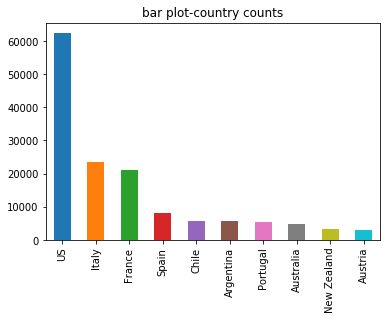

In [35]:
df_original['country'].value_counts().head(10).plot.bar()
plt.title('bar plot-country counts')

# LINE PLOT

Text(0.5, 1.0, 'Line plot-Price variation')

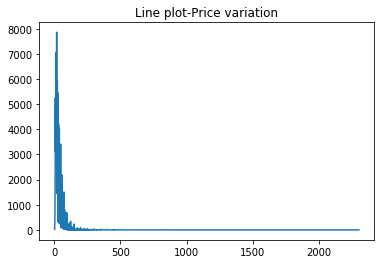

In [36]:
df_original['price'].value_counts().sort_index().plot.line()
plt.title('Line plot-Price variation')

# KDE PLOT

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Kde plot-Price')

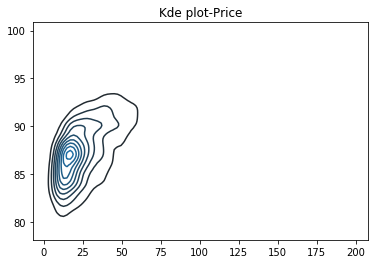

In [37]:
sns.kdeplot(df_original[df_original['price']< 200].loc[:,['price', 'points']].dropna().sample(5000))
plt.title('Kde plot-Price')

# BOX PLOT

Text(0.5, 1.0, 'box plot- Different varieties')

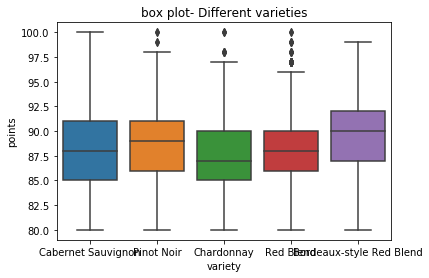

In [38]:
df1= df_original[df_original.variety.isin(df_original.variety.value_counts().head(5).index)]

sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df1
)
plt.title('box plot- Different varieties')